# Natural Language Processing with gensim

- **Created by Andrés Segura Tinoco**
- **Created on June 09, 2019**

**Gensim** is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

## Example with a document in English

In [1]:
# Load Python libraries
import io
import re
import numpy as np
from collections import Counter
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load NLP libraries from gensim and spacy
from gensim.models import Word2Vec
import spacy.lang.en as en

In [3]:
# Load Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1 - Read natural text from a book

In [4]:
# Util function to read a plain text file
def read_text_file(file_path):
    text = ""
    with io.open(file_path, 'r', encoding = 'ISO-8859-1') as f:
        text = f.read()
    
    return text;

In [5]:
# Get text sample
file_path = "../data/en/The Adventures of Sherlock Holmes - Arthur Conan Doyle.txt"
plain_text = read_text_file(file_path)
len(plain_text)

576467

In [6]:
# Show first 1000 characters of document
plain_text[:1000]

"\nProject Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: The Adventures of Sherlock Holmes\n\nAuthor: Arthur Conan Doyle\n\nRelease Date: November 29, 2002 [EBook #1661]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I.     A Scandal in Bohemia\n   II.    The Red-Headed League\n   III.   A Case of Identity\n   IV.    The Boscombe Valley Mystery\n   V.     The Five Orange Pips\n   VI.    The Man with the 

### Step 2 - Tokenize and remove Stopwords

In [7]:
# Cleaing the text
clean_text = plain_text.lower()
clean_text = clean_text.replace('\n', '.')
clean_text = re.sub('[^a-zA-Z.]', ' ', clean_text)
clean_text = re.sub(r'\s+', ' ', clean_text)
clean_text = re.sub(r'\.+', ".", clean_text)
clean_text[:1000]

'.project gutenberg s the adventures of sherlock holmes by arthur conan doyle.this ebook is for the use of anyone anywhere at no cost and with.almost no restrictions whatsoever. you may copy it give it away or.re use it under the terms of the project gutenberg license included.with this ebook or online at www.gutenberg.net.title the adventures of sherlock holmes.author arthur conan doyle.release date november ebook .last updated may .language english.character set encoding utf . start of this project gutenberg ebook the adventures of sherlock holmes .produced by an anonymous project gutenberg volunteer and jose menendez.cover.the adventures of sherlock holmes.by arthur conan doyle.contents. i. a scandal in bohemia. ii. the red headed league. iii. a case of identity. iv. the boscombe valley mystery. v. the five orange pips. vi. the man with the twisted lip. vii. the adventure of the blue carbuncle. viii. the adventure of the speckled band. ix. the adventure of the engineer s thumb. x. t

In [8]:
# Tokenize text in sentences
sentence_list = clean_text.split('.')
len(sentence_list)

14592

In [9]:
# Tokenize sentences in words
word_list = [sentence.split() for sentence in sentence_list if len(sentence.split()) > 0]
word_list[:10]

[['project',
  'gutenberg',
  's',
  'the',
  'adventures',
  'of',
  'sherlock',
  'holmes',
  'by',
  'arthur',
  'conan',
  'doyle'],
 ['this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with'],
 ['almost', 'no', 'restrictions', 'whatsoever'],
 ['you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or'],
 ['re',
  'use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included'],
 ['with', 'this', 'ebook', 'or', 'online', 'at', 'www'],
 ['gutenberg'],
 ['net'],
 ['title', 'the', 'adventures', 'of', 'sherlock', 'holmes'],
 ['author', 'arthur', 'conan', 'doyle']]

In [10]:
# Count the words in a document and return the most N repeated
def count_words(sentences, n):
    words = Counter()
    
    for sent in sentences:
        for word in sent:
            words[word] += 1
    
    return words.most_common(n)

In [11]:
# Get the most common words in the document
n_words = count_words(word_list, 50)
df = DataFrame.from_records(n_words, columns = ['word', 'quantity'])
df.head(10)

,word,quantity
0,the,5636
1,i,3038
2,and,3020
3,to,2744
4,of,2661
5,a,2643
6,in,1766
7,that,1752
8,it,1737
9,you,1503


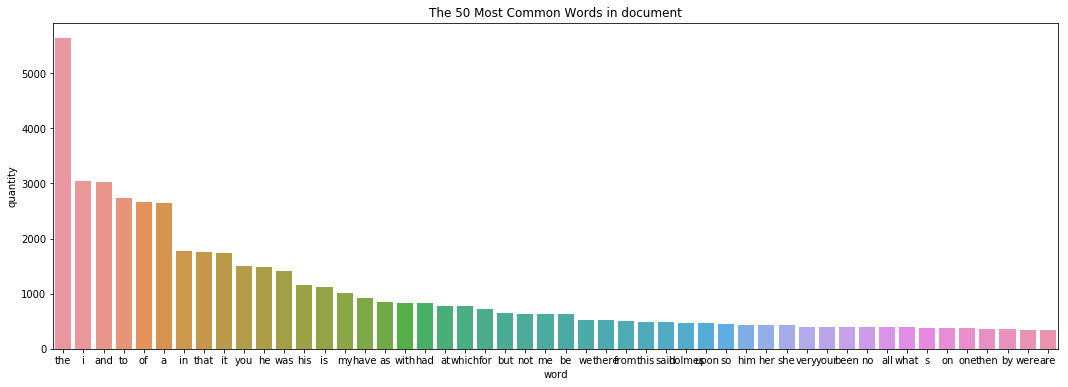

In [12]:
# Plot the most common words in the document
fig = plt.figure(figsize = (18, 6))
sns.barplot(x = 'word', y = 'quantity', data = df)
plt.title('The 50 Most Common Words in document')
plt.show()

**Stopwords:** refers to the most common words in a language, which do not significantly affect the meaning of the text.

In [13]:
# Get English stopwords
stopwords_en = en.stop_words.STOP_WORDS
print(stopwords_en)

{'‘ll', 'eleven', 'while', 'bottom', 'cannot', 'himself', 'latter', 'keep', 'moreover', 'three', 'to', 'thereby', 'wherever', 'itself', 'onto', 'whole', 'may', "'re", 'really', 'becoming', 'elsewhere', 'his', 'sixty', 'mostly', 'so', 'whether', 'which', 'whither', 'fifteen', 'here', 'under', 'used', 'whenever', 'latterly', 'it', 'how', 'than', 'again', 'other', 'her', 'themselves', 'whoever', 'move', 'nevertheless', 'ten', 'everything', 'beforehand', 'on', '’ll', 'after', 'alone', 'ca', 'meanwhile', 'upon', 'whereas', 'such', 'might', 'above', 'some', 'their', 'empty', 'twenty', 'n’t', 'get', 'yourselves', 'around', 'sometimes', 'behind', 'had', 'go', 'was', 'somehow', '‘re', 'if', 'rather', "'s", 'has', 'third', 'hereupon', 'what', 'further', 'ours', 'am', 'however', 'seeming', 'top', 'or', 'herein', 'were', 'why', 'nor', 'made', 'except', 'nobody', 'these', 'anyway', 'still', 'became', 'due', 'much', 'thereupon', 'various', 'at', 'among', 'before', 'doing', 'five', 'must', 'regarding

In [14]:
# Remove stopwords
all_words = []
for ix in range(len(word_list)):
    all_words.append([word for word in word_list[ix] if (word not in stopwords_en and len(word) > 2)])

all_words[:10]

[['project',
  'gutenberg',
  'adventures',
  'sherlock',
  'holmes',
  'arthur',
  'conan',
  'doyle'],
 ['ebook', 'use', 'cost'],
 ['restrictions', 'whatsoever'],
 ['copy', 'away'],
 ['use', 'terms', 'project', 'gutenberg', 'license', 'included'],
 ['ebook', 'online', 'www'],
 ['gutenberg'],
 ['net'],
 ['title', 'adventures', 'sherlock', 'holmes'],
 ['author', 'arthur', 'conan', 'doyle']]

In [15]:
# Get the most common words in the document after removing the stopwords
n_words = count_words(all_words, 50)
df = DataFrame.from_records(n_words, columns = ['word', 'quantity'])
df.head(10)

,word,quantity
0,said,486
1,holmes,465
2,man,305
3,little,269
4,think,174
5,room,171
6,know,170
7,shall,169
8,come,161
9,time,151


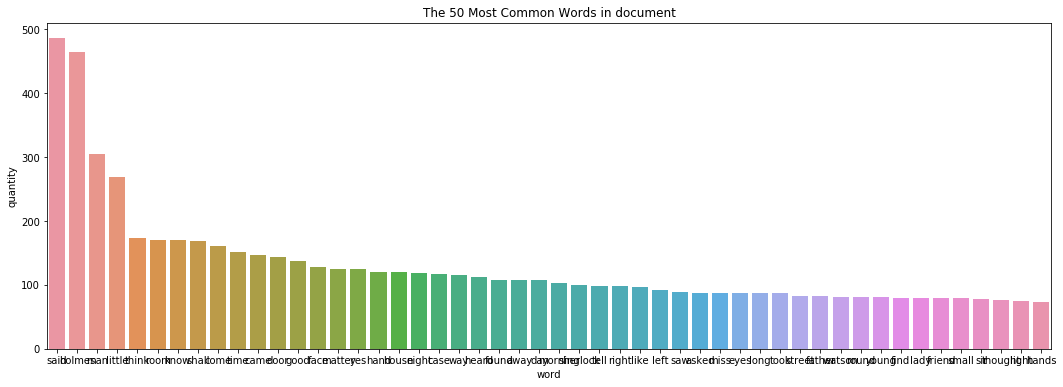

In [16]:
# Plot the most common words in the document after removing the stopwords
fig = plt.figure(figsize = (18, 6))
sns.barplot(x = 'word', y = 'quantity', data = df)
plt.title('The 50 Most Common Words in document')
plt.show()

### Step 3 - Create a Word2Vec model

In [17]:
# Create Word2Vec model
w2v_model = Word2Vec(all_words, min_count = 2)

**Vocabulary:** unique words of the document.

In [18]:
# Show vocabulary size: unique words occurring at least twice
vocabulary = w2v_model.wv.vocab  
len(vocabulary)

4072

In [19]:
# Show 'project' vector
w2v_model.wv['project']

array([ 2.8449595e-03, -4.9694366e-04,  1.9230103e-03,  4.0492006e-03,
        1.0729039e-03, -2.5723472e-03,  5.4888036e-03, -3.7692313e-03,
       -7.4848642e-05, -1.6766953e-03,  1.7807762e-03, -1.6892144e-03,
        2.5574917e-03,  2.1110116e-04,  3.0710178e-03,  3.1984823e-03,
        3.2331848e-03,  2.7966057e-03,  3.1579782e-03,  1.3582964e-03,
       -2.0590653e-03,  2.4833903e-03,  2.9446464e-04,  2.0955815e-03,
        3.5245351e-03,  1.3824453e-03, -1.3032445e-03,  4.8048627e-03,
        1.8905426e-03, -4.1177152e-03,  5.3840424e-03,  3.9010916e-03,
        5.1269173e-03,  4.2400818e-04, -2.0349710e-03, -3.8327286e-03,
       -2.0516610e-03, -3.9965967e-03,  2.5268099e-03, -1.2546158e-03,
        3.9905938e-03, -5.4420991e-04, -7.6779717e-04, -4.2339549e-03,
       -2.8023152e-03, -8.9949672e-04, -2.5319629e-03, -5.5303420e-03,
       -3.2150629e-03,  5.1356154e-03, -4.9937009e-03, -2.8191484e-04,
        9.7763329e-04, -3.1506915e-03,  2.5469938e-03,  1.3207507e-03,
      

**Similar Words:** Words more similar in terms of meaning and context.

In [20]:
# Finding Positive Similar Words
sim_words_pos = w2v_model.wv.most_similar(positive = ['engineer'], topn = 5)
sim_words_pos

[('soon', 0.4715343415737152),
 ('think', 0.470091849565506),
 ('hall', 0.4661974310874939),
 ('cry', 0.4632185399532318),
 ('matter', 0.45925986766815186)]

In [21]:
# Finding Negative Similar Words
sim_words_neg = w2v_model.wv.most_similar(negative = ['engineer'], topn = 5)
sim_words_neg

[('affected', 0.33061444759368896),
 ('group', 0.2769841253757477),
 ('florida', 0.2563122510910034),
 ('flashed', 0.25461259484291077),
 ('daresay', 0.25313204526901245)]

<hr>
<p><a href="https://github.com/ansegura7/NLP/">« Home</a></p>